## Teerameth Rassameecharoenchai
# 61340500032

# 2 Sentiment Analysis
## 2.2 Movie Review Data

Let us first start by looking at the data provided with the exercise. We have positive and negative movie reviews labeled by human readers, all positive and negative reviews are in the ‘pos’ and ‘neg’ folders respectively. If you look in- side a sample file, you will see that these review messages have been ‘tokenized’, where all words are separated from punctuations.
There are approximately 1000 files in each category with files names starting with cv000, cv001, cv002 and so on. You will split the dataset into training set and testing set.

1. Write some code to load the data from text files.

In [1]:
import glob, os

import sklearn.model_selection
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss
from sklearn.model_selection import cross_val_predict, cross_validate, KFold
import pandas as pd
import numpy as np
folders_path = "./review_polarity/txt_sentoken/"
pos_path = os.path.join(os.getcwd(), (folders_path + 'pos'))
neg_path = os.path.join(os.getcwd(), (folders_path + 'neg'))
pos_files = glob.glob(pos_path + '/*.txt')
neg_files = glob.glob(neg_path + '/*.txt')
data, label = [], []
# วน loop เพื่อ load ไฟล์ (ได้มาเป็น list ของ string ที่แสดงถึงแต่ละบรรทัดในเอกสารแล้วจับรวมกันเป็น string 1 อันต่อเอกสาร)
for file in pos_files:
    f = open(file,"r")
    lines = f.readlines()
    string = ""
    for line in lines: string += line
    data.append(string)
    label.append(1) # label 1 as positive
for file in neg_files:
    f = open(file,"r")
    lines = f.readlines()
    string = ""
    for line in lines: string += line
    data.append(string)
    label.append(0) # label 0 as negative

# Train-Test split 80:20
train, test, label_train, label_test = sklearn.model_selection.train_test_split(data, label, test_size=0.2, random_state=136)

## 2.3 TF-IDF
From a raw text review, you want to create a vector, whose elements indicate the number of each word in each document. The frequency of all words within the documents are the ‘features’ of this machine learning problem.

A popular method for transforming a text to a vector is called tf-idf, short for term frequencyinverse document frequency.

1. Conduct a research about tf-idf and explain how it works.
2. Scikit-learn provides a module for calculating this, this is called TfidfVec- torizer.
You can study how this function is used here:

`http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html`

Write code to transform your text to tf-idf vector.

In [2]:
# สรุป tf-idf ที่ได้อ่านจาก towarddatascience.com เพื่อแปลงเอกสารเป็น tf-idf vector สำหรับนำไปใช้กับ model
# tf(t,d) = count of t in d / number of words in d
# Document Frequency: df(t) = occurrecnce of t in documents
# Inverse Document Frequency: idf(t) = N/df = log(N/(df+1))
# td-idf(t,d) = tf(t,d)*log(N/(df+1))
# Ref: https://towardsdatascience.com/tf-idf-for-document-ranking-from-scratch-in-python-on-real-world-dataset-796d339a4089
from sklearn.feature_extraction.text import TfidfVectorizer , TfidfTransformer
# Pipeline vectorizer object & Compute TF-IDF scores
vectorizer = TfidfVectorizer(analyzer='word' , stop_words='english')
tf_trans = TfidfTransformer()
tf_idf_vector_train = tf_trans.fit_transform(vectorizer.fit_transform(train))
tf_idf_vector_test = tf_trans.fit_transform(vectorizer.transform(test)) # test set ใช้ vectorizer ตัวเดียวกับ training set เพื่อให้ feature ตรงกันจะได้เทียบกันได้
# แปลงเป็น tf-idf vector แล้วก็แปลงเป็น pandas dataframe ต่อ
X_train = pd.DataFrame(tf_idf_vector_train.toarray(), columns=vectorizer.get_feature_names())
X_test = pd.DataFrame(tf_idf_vector_test.toarray(), columns=vectorizer.get_feature_names())
y_train = np.ravel(pd.DataFrame(np.asarray(label_train)))
y_test = np.ravel(pd.DataFrame(np.asarray(label_test)))
[X_train.shape, X_test.shape, y_train.shape, y_test.shape]

[(1600, 35948), (400, 35948), (1600,), (400,)]

## 2.4 Classification

Use 4 different models to classify each movie into positive or negative category.

1. K-Nearestneighbormodel,using module `sklearn.neighbors.KNeighborsClassifier`
2. RandomForest, using module `sklearn.ensemble.RandomForestClassifier`
3. SVM, using module `sklearn.svm.SVC`
4. Neural network, using `sklearn.neural_network.MLPClassifier`

You may pick other models you would like to try. Just present results for at least 4 models.
Please provide your code for model fitting and cross validation. Calculate your classification accuracy, precision, and recall.

In [3]:
# ทำ cross validation แล้วเอามาทดสอบด้วย test set อีกทีโดยทำเป็น classification report เพื่อให้ได้ทั้ง accuracy, precision, recall
# Build 4 models and store in list
knc = KNeighborsClassifier(n_neighbors=5)
rfc = RandomForestClassifier(n_estimators=100, random_state=136)
svc = SVC(kernel='rbf', random_state=136)
mlpc = MLPClassifier(hidden_layer_sizes=(64,), activation='relu', early_stopping=True, n_iter_no_change=20, random_state=136)
model_list = [knc, rfc, svc, mlpc]
model_names = ['K Neighbors Classifier', 'Random Forest Classifier', 'SVC', 'Neural Network']
for i, model in enumerate(model_list): # Loop all models in list
    # Apply cross validation using K=5
    for j, model in enumerate(cross_validate(model, X_train, y_train, cv=5, return_estimator=True)['estimator']):
        y_pred = model.predict(X_test)
        print("Model name: %s [Fold %d]"%(model_names[i], j))
        print("Confusion Matrix")
        print(confusion_matrix(y_test, y_pred))
        print("Classification report")
        print(classification_report(y_test, y_pred, target_names=['Neg', 'Pos']))

Model name: K Neighbors Classifier [Fold 0]
Confusion Matrix
[[121  77]
 [ 73 129]]
Classification report
              precision    recall  f1-score   support

         Neg       0.62      0.61      0.62       198
         Pos       0.63      0.64      0.63       202

    accuracy                           0.62       400
   macro avg       0.62      0.62      0.62       400
weighted avg       0.62      0.62      0.62       400

Model name: K Neighbors Classifier [Fold 1]
Confusion Matrix
[[114  84]
 [ 67 135]]
Classification report
              precision    recall  f1-score   support

         Neg       0.63      0.58      0.60       198
         Pos       0.62      0.67      0.64       202

    accuracy                           0.62       400
   macro avg       0.62      0.62      0.62       400
weighted avg       0.62      0.62      0.62       400

Model name: K Neighbors Classifier [Fold 2]
Confusion Matrix
[[120  78]
 [ 75 127]]
Classification report
              precision    r

## 2.5 Model Tuning

Can you try to beat the simple model you created above? Here are some things you may try:

* When creating TfidfVectorizer object, you may tweak sublinear_tf parameter which use the tf with logarithmic scale instead of the usual tf.
* You may also exclude words that are too frequent or too rare, by adjusting max_df and min_df.
* Adjusting parameters available in the model, like neural network structure or number of trees in the forest.

Design at least 3 experiments using these techniques. Show your experimental results.

แยก dataset ใหม่เป็น train-validation-test ในอัตราส่วน 70:20:10 โดยใช้ validation set เป็นตัววัดว่าควรเลือก parameter อันไหนดีโดยใช้ log_loss เป็นเกณฑ์ จากนั้นจึงทดสอบด้วย test set อีกที
ตอนแปลง dataset เป็น tf-idf vector ก็ใช้ feture เดียวกันกับ training set ทั้งหมด

In [4]:
## Use 1+log(tf) by setting sublinear_tf=True
vectorizer = TfidfVectorizer(analyzer='word',
                             stop_words='english',
                             sublinear_tf=True,
                             max_df=0.9, # exclude too frequence words (more than 0.9 by proportion of documents)
                             min_df=0.1) # exclude less sequence words (less than 0.1 by proportion of documents)
tf_trans = TfidfTransformer()
tf_idf_vector=tf_trans.fit_transform(vectorizer.fit_transform(train))
X = pd.DataFrame(tf_idf_vector.toarray(), columns=vectorizer.get_feature_names())
y = np.ravel(pd.DataFrame(np.asarray(label)))

## Train-Val-Test split 70:20:10
train, buff, label_train, label_buff = sklearn.model_selection.train_test_split(data, label, test_size=0.3)
val, test, label_val, label_test = sklearn.model_selection.train_test_split(buff, label_buff, test_size=0.33)
vectorizer = TfidfVectorizer(analyzer='word' , stop_words='english')
tf_trans = TfidfTransformer()
tf_idf_vector_train = tf_trans.fit_transform(vectorizer.fit_transform(train))
tf_idf_vector_val = tf_trans.fit_transform(vectorizer.transform(val))
tf_idf_vector_test = tf_trans.fit_transform(vectorizer.transform(test))
X_train = pd.DataFrame(tf_idf_vector_train.toarray(), columns=vectorizer.get_feature_names())
X_val = pd.DataFrame(tf_idf_vector_val.toarray(), columns=vectorizer.get_feature_names())
X_test = pd.DataFrame(tf_idf_vector_test.toarray(), columns=vectorizer.get_feature_names())
y_train = np.ravel(pd.DataFrame(np.asarray(label_train)))
y_val = np.ravel(pd.DataFrame(np.asarray(label_val)))
y_test = np.ravel(pd.DataFrame(np.asarray(label_test)))
[X_train.shape, X_test.shape, y_train.shape, y_test.shape]

[(1400, 34085), (198, 34085), (1400,), (198,)]

Tune KNC for number of neighbors
วน loop ลองใช้ค่า K ต่าง ๆ แล้วนำมา plot graph ควรจะได้กราฟที่จะเริ่มมี log_loss นิ่งเมื่อ K มากถึงระดับนึง (ถ้า K น้อยจะทำให้ noise มีผลมากแต่ถ้า K มากไปจะทำให้ใช้ทรัพยากรมาก)

Text(0, 0.5, 'log_loss')

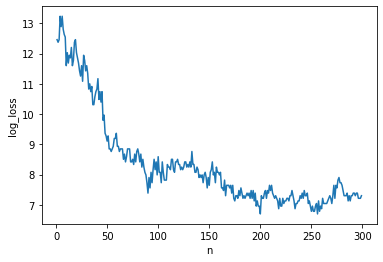

In [5]:
log = {'n':[], 'log_loss':[]}
for n in range(1, 300):
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc = log_loss(y_val, y_pred)
    print("n=%d: %f"%(n,acc), end='\r')
    log['n'].append(n)
    log['log_loss'].append(acc)
plt.plot(log['n'], log['log_loss'])
plt.xlabel('n')
plt.ylabel('log_loss')

เลือก n=100 เนื่องจากมีค่าน้อย(จะได้ใช้ทรัพยากรน้อย)แต่ให้ loss น้อยพอสมควรใน validation set

In [6]:
model = KNeighborsClassifier(n_neighbors=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print("Classification report")
print(classification_report(y_test, y_pred, target_names=['Neg', 'Pos']))

Confusion Matrix
[[78 20]
 [26 74]]
Classification report
              precision    recall  f1-score   support

         Neg       0.75      0.80      0.77        98
         Pos       0.79      0.74      0.76       100

    accuracy                           0.77       198
   macro avg       0.77      0.77      0.77       198
weighted avg       0.77      0.77      0.77       198



Tune Random Forest Classification
วน loop ทดลองกำหนดจำนวนต้นไม้แล้ว plot log_loss เทียบด้วยเหตุผลเดียวกับ KNC

Text(0, 0.5, 'log_loss')

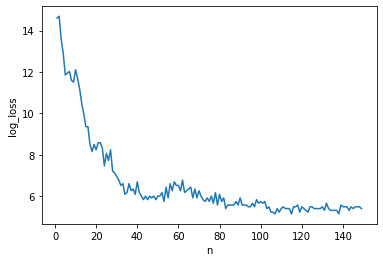

In [7]:
log = {'n':[], 'log_loss':[]}
for n in range(1, 150):
    model = RandomForestClassifier(n_estimators=n, random_state=136)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc = log_loss(y_val, y_pred)
    print("n=%d: %f"%(n,acc), end="\r")
    log['n'].append(n)
    log['log_loss'].append(acc)
plt.plot(log['n'], log['log_loss'])
plt.xlabel('n')
plt.ylabel('log_loss')

เลือกจำนวน tree = 40 เนื่องจาก log_loss เริ่มลู่เข้าพอดีเมื่อทดสอบกับ validation set (ถ้าใช้จำนวน tree มากเกินไปจะใช้ทรัพยากรมากไปด้วย)
และได้ผลลัพทธ์จาก test set ดังนี้

In [8]:
model = RandomForestClassifier(n_estimators=40, random_state=136)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print("Classification report")
print(classification_report(y_test, y_pred, target_names=['Neg', 'Pos']))

Confusion Matrix
[[84 14]
 [44 56]]
Classification report
              precision    recall  f1-score   support

         Neg       0.66      0.86      0.74        98
         Pos       0.80      0.56      0.66       100

    accuracy                           0.71       198
   macro avg       0.73      0.71      0.70       198
weighted avg       0.73      0.71      0.70       198



Tune SVM for kernel
ลองเลือกใช้ kernel แบบต่าง ๆ เพื่อดูว่า fit ด้วยอะไรแล้วเข้ากับข้อมูลได้ดีที่สุด

In [9]:
kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']
log_loss_list = []
model_list = []
for kernel in kernel_list:
    model = SVC(kernel=kernel, random_state=136)
    model.fit(X_train, y_train)
    model_list.append(model)
    y_pred = model.predict(X_val)
    acc = log_loss(y_val, y_pred)
    print("kernel=%s: %f"%(kernel,acc))
    log_loss_list.append(acc)
selected_kernel = kernel_list[log_loss_list.index(min(log_loss_list))]
print("Select "+selected_kernel+" as kernel due to lowest log_loss in validation set.")

kernel=linear: 6.959395
kernel=poly: 11.942608
kernel=rbf: 7.388998
kernel=sigmoid: 7.388990
Select linear as kernel due to lowest log_loss in validation set.


In [10]:
model = model_list[log_loss_list.index(min(log_loss_list))] # pick best model to test
y_pred = model.predict(X_test)
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print("Classification report")
print(classification_report(y_test, y_pred, target_names=['Neg', 'Pos']))

Confusion Matrix
[[77 21]
 [19 81]]
Classification report
              precision    recall  f1-score   support

         Neg       0.80      0.79      0.79        98
         Pos       0.79      0.81      0.80       100

    accuracy                           0.80       198
   macro avg       0.80      0.80      0.80       198
weighted avg       0.80      0.80      0.80       198



Tune Neural Network hyperparameter using grid search (hidden layer size ,activation function, solver, learning rate)
(นานมากกกก)

In [11]:
# Ref:https://panjeh.medium.com/scikit-learn-hyperparameter-optimization-for-mlpclassifier-4d670413042b
mlp_gs = MLPClassifier(max_iter=1000, early_stopping=True, n_iter_no_change=20, random_state=136) # Setup early stop if no improvement by 20 iteration
parameter_space = {
    'hidden_layer_sizes': [(64,32,64),(64,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.001, 0.005, 0.01, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5) # 5-folds of K-fold validation
clf.fit(X_train, y_train)
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.005, 'hidden_layer_sizes': (64, 32, 64), 'learning_rate': 'constant', 'solver': 'adam'}


In [12]:
mlp_gs_best = clf.best_estimator_
y_pred = mlp_gs_best.predict(X_test)
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print("Classification report")
print(classification_report(y_test, y_pred, target_names=['Neg', 'Pos']))


Confusion Matrix
[[79 19]
 [21 79]]
Classification report
              precision    recall  f1-score   support

         Neg       0.79      0.81      0.80        98
         Pos       0.81      0.79      0.80       100

    accuracy                           0.80       198
   macro avg       0.80      0.80      0.80       198
weighted avg       0.80      0.80      0.80       198



# 3 Text Clustering
We have heard about Google News clustering. In this exercise, we are going to implement it with Python.

## 3.1 Data Preprocessing
Let’s switch up and use another dataset called 20newsgroup data, which is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups. The data is collected from a university’s mailing list, where students exchange opinions in everything from motorcycles to middle east politics.

1. Import data using sklearn.datasets.fetch_20newsgroups 
2. Transform data to vector with TfidfVectorizer

load dataset มาเเล้วทำเหมือนเดิมคือแปลงให้เป็น tf-idf vector แต่คราวนี้ไม่ต้องแบ่ง train-test แล้วเพราะเรากำลังทำ clustering อยู่

In [13]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer , TfidfTransformer

newsgroups = fetch_20newsgroups(subset='train')
vectorizer = TfidfVectorizer(analyzer='word',
                             stop_words='english',
                             max_df=0.9, # exclude too frequence words (more than 0.99 by proportion of documents)
                             min_df=0.1) # exclude less frequence words (less than 0.01 by proportion of documents)
vectors = vectorizer.fit_transform(newsgroups.data)
print(vectors.shape)

(11314, 62)


## 3.2 Clustering
We are going to use the simplest clustering model, k-means clustering, to do this task. Our hope is that this simple algorithm will result in meaningful news categories, without using labels.

1. Fit K-Means clustering model to the text vector. What is the value of K you should pick? Why?
2. Use Silhouette score to evaluate your clusters. Try to evaluate the model for different values of k to see which k fits best for the dataset.

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
from matplotlib import pyplot as plt

X = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names())
y = newsgroups.target
scaler = StandardScaler()
X = scaler.fit_transform(X)

นำมา loop ลองค่า K ต่าง ๆ แล้วคำนวนหาทั้ง silhouette score และ sum od squared distance เพื่อนำมา plot graph ดูว่าควรใช้ค่า K เท่าไหร่ดีจาก elbow method

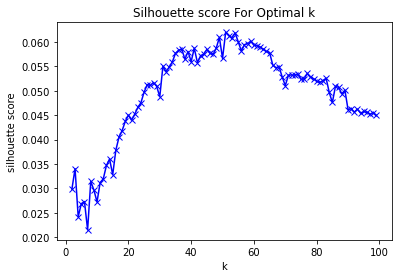

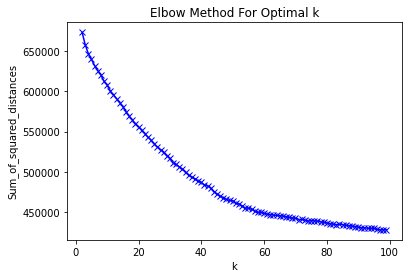

In [15]:
# Ref: https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f
silhouette_score_list = []
sse = []
K = range(2, 100)
for k in K:
    kmeans = KMeans(init="random",n_clusters=k, n_init=10,max_iter=300, random_state=136)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_score_list.append(score)
    sse.append(kmeans.inertia_)
    print("k=%d: silhouette score=%f"%(k, score), end='\r')
plt.plot(K, silhouette_score_list, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.title('Silhouette score For Optimal k')
plt.show()
plt.plot(K, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

graph ของ silhouette score ดูเพื่อเลือกค่า K ที่ดีที่สุดได้ง่ายคือหยิบอันที่ได้ score มากที่สุดมาเลย
แต่ graph ของ sum of squared error ดูยากจึงยึดตาม silhouette score ดีกว่า

In [16]:
best = silhouette_score_list.index([max(silhouette_score_list)])+2
print("Best k is %d (selected from highest silhouette score)"%best)

Best k is 51 (selected from highest silhouette score)


# 3.3 Topic Terms
We want to explore each cluster to understand what news articles are in the cluster, what terms are associated with the cluster. This will require a bit of hacking.
1. Use TfidfVectorizer.get feature names to extract words associated with each dimension of the text vector.
2. Extract cluster’s centroids using kmeans.cluster centers .
3. For each centroid, print the top 15 words that have the highest frequency.

นำค่า K ที่ทดสอบเเลวว่าดีที่สุดมาทำ clustering แล้วดึง centroid จากนั้นทำการเรียงลำดับ tf-idf แล้ว print features ที่มี tf-idf มากที่สุด 15 อันดับเเรกออกมา

In [17]:
kmeans = KMeans(init="random",n_clusters=best, n_init=10,max_iter=300)
kmeans.fit(X)
y_pred = kmeans.predict(X)

In [18]:
feature_names = np.array(vectorizer.get_feature_names()) # Get feature names
centroids = kmeans.cluster_centers_ # Get cluster's centroid
for i, centroid in enumerate(centroids):
    print("Centroid: %d"%i)
    tfidf_sorting = np.argsort(np.array(centroid)).flatten()[::-1] # Sorting tf-idf in centroid
    top_n = feature_names[tfidf_sorting][:15] # Get 15 word with top frequency
    print(top_n)

Centroid: 0
['sure' 'writes' 'article' 'edu' 'nntp' 'just' 'host' 'posting' 'make'
 'com' 'let' 'like' 'way' 'did' 'world']
Centroid: 1
['read' 'don' 'question' 'thanks' 'want' 'reply' 'know' 'need' 'help'
 'people' 'writes' 'say' 'work' 'use' 'posting']
Centroid: 2
['mail' 'thanks' 'reply' 'university' 've' 'know' 'read' 'used' 'new'
 'usa' 'use' 'like' 'does' 'll' 'ca']
Centroid: 3
['right' 'way' 'just' 'people' 'say' 'does' 'writes' 'did' 'years' 'like'
 'state' 'got' 'article' 'thing' 'said']
Centroid: 4
['cs' 'edu' 'computer' 'article' 'writes' 'university' 'reply' 'ca'
 'believe' 'doesn' 'distribution' 'thing' 'll' 'read' 'years']
Centroid: 5
['host' 'nntp' 'posting' 'thanks' 'reply' 'com' 'mail' '10' 'edu'
 'computer' 'need' 'does' 'help' 'know' 'used']
Centroid: 6
['usa' 'distribution' 'nntp' 'host' 'posting' 'edu' 'university' 'thanks'
 'mail' 'com' '10' 'computer' 'need' 'reply' 'work']
Centroid: 7
['doesn' 'like' 'just' 'know' 'writes' 'article' 'going' 'really' 'work'
 'doe